In [ ]:
pip install --upgrade nltk

In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer



In [ ]:
# Download NLTK resources
nltk.download('popular')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Load dataset
df = pd.read_csv('books.csv')
df.head()



isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  
0            3.85      247.0          361.0  
1            3.83      241.0         5164.0  
2            3.97      479.0          172.0  
3            3.93      512.0        29532.0  
4            4.15      170.0        33684.0

In [ ]:
useful = ['title', 'subtitle', 'authors', 'categories', 'description']

data = df[useful]
data.head()

title subtitle                          authors  \
0          Gilead      NaN               Marilynne Robinson   
1    Spider's Web  A Novel  Charles Osborne;Agatha Christie   
2    The One Tree      NaN             Stephen R. Donaldson   
3  Rage of angels      NaN                   Sidney Sheldon   
4  The Four Loves      NaN              Clive Staples Lewis   

                      categories  \
0                        Fiction   
1  Detective and mystery stories   
2               American fiction   
3                        Fiction   
4                 Christian life   

                                         description  
0  A NOVEL THAT READERS and critics have been eag...  
1  A new 'Christie for Christmas' -- a full-lengt...  
2  Volume Two of Stephen Donaldson's acclaimed se...  
3  A memorable, mesmerizing heroine Jennifer -- b...  
4  Lewis' work on the nature of love divides love...

## **Task 1: Data Preprocessing and Exploration**

In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tokenize_with_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc]

def preprocess_text(text):
    if pd.isna(text):
        return ''
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = tokenize_with_spacy(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def generate_ngrams(tokens, n):
    return list(zip(*[tokens[i:] for i in range(n)]))

def plot_frequent_ngrams(token_lists, n=1, top_k=10):
    all_tokens = [token for sublist in token_lists for token in sublist]
    n_grams = generate_ngrams(all_tokens, n)
    freq_dist = Counter(n_grams)
    top_ngrams = freq_dist.most_common(top_k)
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=['N-gram', 'Frequency'])
    top_ngrams_df['N-gram'] = top_ngrams_df['N-gram'].apply(lambda x: ' '.join(x))
    fig = px.bar(top_ngrams_df, x='N-gram', y='Frequency',
                 title=f'Top {top_k} Most Frequent {n}-grams')
    fig.show()

data['processed_title'] = data['title'].apply(preprocess_text)
data['processed_subtitle'] = data['subtitle'].apply(preprocess_text)
data['processed_authors'] = data['authors'].apply(preprocess_text)
data['processed_categories'] = data['categories'].apply(preprocess_text)
data['processed_description'] = data['description'].apply(preprocess_text)

data['tokens'] = data['processed_description'].apply(lambda x: x.split())
plot_frequent_ngrams(data['tokens'], n=1, top_k=10)
plot_frequent_ngrams(data['tokens'], n=2, top_k=10)
plot_frequent_ngrams(data['tokens'], n=3, top_k=10)


<ipython-input-8-a9d335e672da>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_title'] = data['title'].apply(preprocess_text)
<ipython-input-8-a9d335e672da>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_subtitle'] = data['subtitle'].apply(preprocess_text)
<ipython-input-8-a9d335e672da>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
pip install nltk plotly

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px

def generate_ngrams(tokens, n):
    return list(zip(*[tokens[i:] for i in range(n)]))

def plot_frequent_ngrams(token_lists, n=1, top_k=10):
    all_tokens = [token for sublist in token_lists for token in sublist]
    n_grams = generate_ngrams(all_tokens, n)
    freq_dist = Counter(n_grams)
    top_ngrams = freq_dist.most_common(top_k)
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=['N-gram', 'Frequency'])
    top_ngrams_df['N-gram'] = top_ngrams_df['N-gram'].apply(lambda x: ' '.join(x))
    fig = px.bar(top_ngrams_df, x='N-gram', y='Frequency',
                 title=f'Top {top_k} Most Frequent {n}-grams')
    fig.show()

data['tokens'] = data['processed_description'].apply(lambda x: x.split())
plot_frequent_ngrams(data['tokens'], n=1, top_k=10)
plot_frequent_ngrams(data['tokens'], n=2, top_k=10)
plot_frequent_ngrams(data['tokens'], n=3, top_k=10)


<ipython-input-10-78fdd989b078>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['processed_description'].apply(lambda x: x.split())


In [ ]:
pip install wordcloud plotly

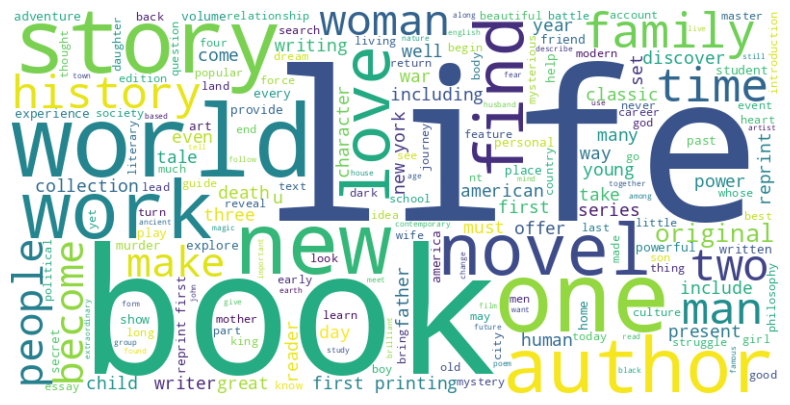

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def generate_word_cloud(text_series):
    combined_text = ' '.join(text_series.dropna().tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    wordcloud_image = wordcloud.to_array()
    fig = go.Figure(go.Image(z=wordcloud_image))
    fig.update_layout(
        title='Word Cloud of Processed Text',
        xaxis=dict(visible=False),
        yaxis=dict(visible=False)
    )
    fig.show()

generate_word_cloud(data['processed_description'])


## **Task 2: TF-IDF Based Similarity**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_description'])

In [ ]:
def recommend_tfidf(query, tfidf_vectorizer, tfidf_matrix, top_k=5):
    query = preprocess_text(query)

    query_vector = tfidf_vectorizer.transform([query])

    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    top_indices = similarities.argsort()[-top_k:][::-1]

    recommendations = data.iloc[top_indices]
    return recommendations

In [ ]:

query = "I love reading science fiction books"
recommendations = recommend_tfidf(query, tfidf_vectorizer, tfidf_matrix, top_k=5)

print("Top 5 Recommended Texts:")
print(recommendations[['title', 'description']])



Top 5 Recommended Texts:
                                               title  \
3435                        Triumph of the Darksword   
1324                      The Poetry of Sylvia Plath   
4860  The Mammoth Book of Golden Age Science Fiction   
6027                            Flowers for Algernon   
183                                             Gold   

                                            description  
3435                                   Science fiction.  
1324  Liquid Metal brings together 'seminal' essays ...  
4860  The Golden Age of Science Fiction, from the ea...  
6027  Discusses the young adult book "Flowers for Al...  
183   Gold is the final and crowning achievement of ...  


## **Task 3: Word Embeddings Based Similarity**

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

df_filtered = data

# Step 1: Train Word2Vec models (CBOW and Skip-gram)
# CBOW model
cbow_model = Word2Vec(sentences=df_filtered['tokens'], vector_size=100, window=5, min_count=1, sg=0)  # sg=0 for CBOW

# Skip-gram model
skipgram_model = Word2Vec(sentences=df_filtered['tokens'], vector_size=100, window=5, min_count=1, sg=1)  # sg=1 for Skip-gram

# Step 2: Convert documents and queries into word embeddings
def document_to_embedding(tokens, model):
    # Filter out words not in the model's vocabulary
    valid_words = [word for word in tokens if word in model.wv]
    if len(valid_words) == 0:
        return np.zeros(model.vector_size)
    # Average the word embeddings
    return np.mean([model.wv[word] for word in valid_words], axis=0)

# Convert all documents to embeddings
df_filtered['cbow_embedding'] = df_filtered['tokens'].apply(lambda x: document_to_embedding(x, cbow_model))
df_filtered['skipgram_embedding'] = df_filtered['tokens'].apply(lambda x: document_to_embedding(x, skipgram_model))

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
def tokenize_with_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc]

def recommend_word2vec(query, model, embeddings_column, top_k=5):
    query_tokens = tokenize_with_spacy(preprocess_text(query))

    # Convert the query to an embedding
    query_embedding = document_to_embedding(query_tokens, model)

    # Compute cosine similarity between the query and all documents
    similarities = cosine_similarity([query_embedding], np.stack(df_filtered[embeddings_column])).flatten()

    # Get the indices of the top k most similar documents
    top_indices = similarities.argsort()[-top_k:][::-1]

    # Return the top k most similar texts
    recommendations = df_filtered.iloc[top_indices]
    return recommendations

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning:

[W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu



In [ ]:
query = "I love reading science fiction books"

# Get recommendations using CBOW
cbow_recommendations = recommend_word2vec(query, cbow_model, 'cbow_embedding', top_k=5)
print("Top 5 Recommendations (CBOW):")
print(cbow_recommendations[['title', 'description']])

# Get recommendations using Skip-gram
skipgram_recommendations = recommend_word2vec(query, skipgram_model, 'skipgram_embedding', top_k=5)
print("Top 5 Recommendations (Skip-gram):")
print(skipgram_recommendations[['title', 'description']])

# Step 4: Compare recommendations
print("Comparison of Top 5 Recommendations:")
print("CBOW Recommendations:")
print(cbow_recommendations[['title', 'description']])
print("\nSkip-gram Recommendations:")
print(skipgram_recommendations[['title', 'description']])

Top 5 Recommendations (CBOW):
                                           title  \
1946  A Supposedly Fun Thing I'll Never Do Again   
264                            The Cat's Pajamas   
1674  A Supposedly Fun Thing I'll Never Do Again   
1459                                Isak Dinesen   
6027                        Flowers for Algernon   

                                            description  
1946  A collection of insightful and uproariously fu...  
264   From the winner of the National Book Foundatio...  
1674  In this exuberantly praised book - a collectio...  
1459  Winner of the National Book Award A brilliant ...  
6027  Discusses the young adult book "Flowers for Al...  
Top 5 Recommendations (Skip-gram):
                                                  title  \
6027                               Flowers for Algernon   
3842                            Uncle Shelby'S Abz Book   
6084  Hemingway and Bailey's Bartending Guide to Gre...   
2435              The Norton Anthology